In [89]:
import numpy             as np
from scipy                           import stats
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns; sns.set()
from sklearn.model_selection         import train_test_split,cross_val_score
from sklearn.linear_model            import Lasso
from sklearn.metrics                 import confusion_matrix, accuracy_score,mean_squared_error
from sklearn.ensemble                import RandomForestRegressor, AdaBoostClassifier,GradientBoostingRegressor
from sklearn.linear_model.logistic   import LogisticRegression
from sklearn.svm                     import SVR
from sklearn                         import preprocessing

In [90]:
rng                = np.random.RandomState(42)

In [91]:
trainDataFile      = './price_data/train.csv'
testDataFile       = './price_data/test.csv' 
train_df           = pd.read_csv(trainDataFile)
test_df            = pd.read_csv(testDataFile)

In [92]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
#search for text-based features that have NaNs in train_df
for i in list(train_df.columns.values):
    if train_df[i].isnull().any() == True:
        if train_df[i].dtypes == object:
            print(i,train_df[i].isnull().any())

Alley True
MasVnrType True
BsmtQual True
BsmtCond True
BsmtExposure True
BsmtFinType1 True
BsmtFinType2 True
Electrical True
FireplaceQu True
GarageType True
GarageFinish True
GarageQual True
GarageCond True
PoolQC True
Fence True
MiscFeature True


In [8]:
#fill in NaNs with their text definitions provided in data_descriptions.txt
train_df     = train_df.fillna({'Alley':'NoAlley'})
train_df     = train_df.fillna({'BsmtQual':'NoBasement'})
train_df     = train_df.fillna({'BsmtCond':'NoBasement'})
train_df     = train_df.fillna({'BsmtExposure':'NoBasement'})
train_df     = train_df.fillna({'BsmtFinType1':'NoBasement'})
train_df     = train_df.fillna({'BsmtFinType2':'NoBasement'})
train_df     = train_df.fillna({'FireplaceQu':'NoFireplace'})
train_df     = train_df.fillna({'GarageType':'NoGarage'})
train_df     = train_df.fillna({'GarageFinish':'NoGarage'})    
train_df     = train_df.fillna({'GarageQual':'NoGarage'})
train_df     = train_df.fillna({'GarageCond':'NoGarage'})
train_df     = train_df.fillna({'PoolQC':'NoPool'})
train_df     = train_df.fillna({'Fence':'NoFence'})
train_df     = train_df.fillna({'MiscFeature':'None'})

In [9]:
#Are there any more text-based features with NaNs?
train_cat_NaN = []
for i in list(train_df.columns.values):
    if train_df[i].isnull().any() == True:
        if train_df[i].dtypes == object:
            print(i,train_df[i].isnull().any())
            train_cat_NaN.append(i)

#We will fill in these NaN's after we split the training set
print(train_cat_NaN)

MasVnrType True
Electrical True
['MasVnrType', 'Electrical']


In [10]:
#Are there any numeric features with NaNs?
train_num_NaN = []
for i in list(train_df.columns.values):
    if train_df[i].isnull().any() == True:
        if train_df[i].dtypes != object:
            print(i,train_df[i].isnull().any())
            train_num_NaN.append(i)

#We will fill in these NaN's after we split the training set
print(train_num_NaN)

LotFrontage True
MasVnrArea True
GarageYrBlt True
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [11]:
#search for text-based features that have NaNs in test_df
for i in list(test_df.columns.values):
    if test_df[i].isnull().any() == True:
        if test_df[i].dtypes == object:
            print(i,test_df[i].isnull().any())

MSZoning True
Alley True
Utilities True
Exterior1st True
Exterior2nd True
MasVnrType True
BsmtQual True
BsmtCond True
BsmtExposure True
BsmtFinType1 True
BsmtFinType2 True
KitchenQual True
Functional True
FireplaceQu True
GarageType True
GarageFinish True
GarageQual True
GarageCond True
PoolQC True
Fence True
MiscFeature True
SaleType True


In [12]:
#MSZoning
#Utilities
#Exterior1st
#Exterior2nd
#MasVnrType
#KitchenQual
#Functional
#SaleType
test_df      = test_df.fillna({'Alley':'NoAlley'})
test_df      = test_df.fillna({'BsmtQual':'NoBasement'})
test_df      = test_df.fillna({'BsmtCond':'NoBasement'})
test_df      = test_df.fillna({'BsmtExposure':'NoBasement'})
test_df      = test_df.fillna({'BsmtFinType1':'NoBasement'})
test_df      = test_df.fillna({'BsmtFinType2':'NoBasement'})
test_df      = test_df.fillna({'FireplaceQu':'NoFireplace'})
test_df      = test_df.fillna({'GarageType':'NoGarage'})
test_df      = test_df.fillna({'GarageQual':'NoGarage'})
test_df      = test_df.fillna({'GarageCond':'NoGarage'})
test_df      = test_df.fillna({'GarageFinish':'NoGarage'})
test_df      = test_df.fillna({'PoolQC':'NoPool'})
test_df      = test_df.fillna({'Fence':'NoFence'})
test_df      = test_df.fillna({'MiscFeature':'None'})  

In [13]:
#Are there any more text-based features with NaNs?
test_cat_NaN = []
for i in list(test_df.columns.values):
    if test_df[i].isnull().any() == True:
        if test_df[i].dtypes == object:
            print(i,test_df[i].isnull().any())
            test_cat_NaN.append(i)

#We will fill in these NaN's later
print(test_cat_NaN)      

MSZoning True
Utilities True
Exterior1st True
Exterior2nd True
MasVnrType True
KitchenQual True
Functional True
SaleType True
['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'KitchenQual', 'Functional', 'SaleType']


In [14]:
#Are there any numeric features with NaNs?
test_num_NaN = []
for i in list(test_df.columns.values):
    if test_df[i].isnull().any() == True:
        if test_df[i].dtypes != object:
            print(i,test_df[i].isnull().any())
            test_num_NaN.append(i)

#We will fill in these NaN's after we split the training set
print(test_num_NaN)

LotFrontage True
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF True
TotalBsmtSF True
BsmtFullBath True
BsmtHalfBath True
GarageYrBlt True
GarageCars True
GarageArea True
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [15]:
#drop MiscFeature b/c MiscVal maps MiscFeature to a value, therefore MiscFeature is redundant
train_df            = train_df.drop(['MiscFeature'],axis=1)
test_df             = test_df.drop(['MiscFeature'],axis=1)      

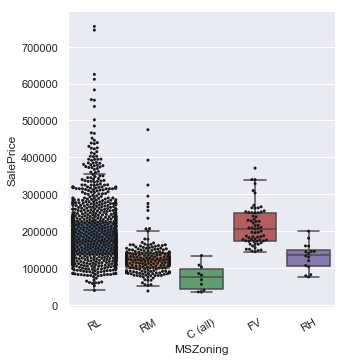

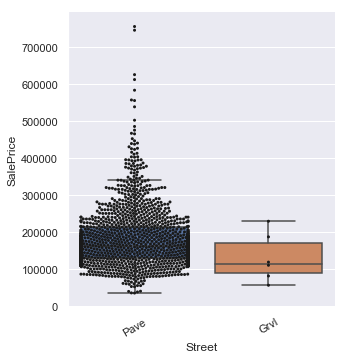

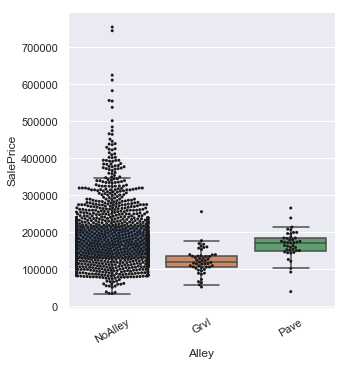

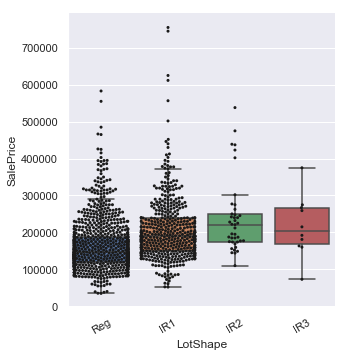

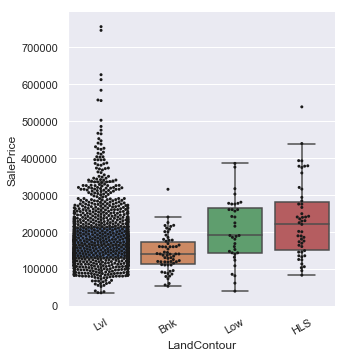

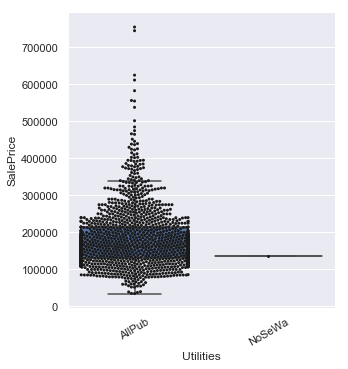

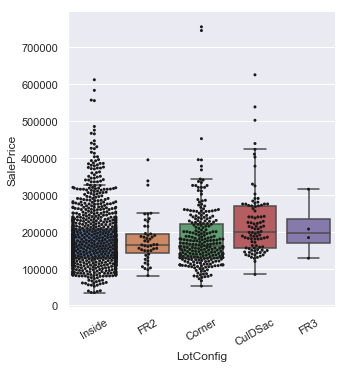

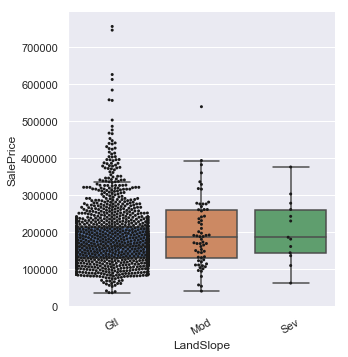

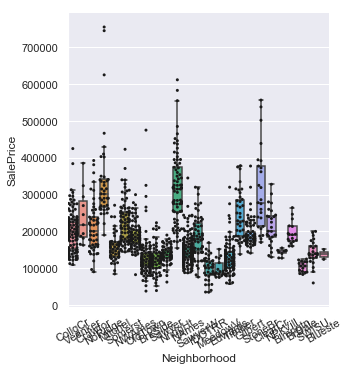

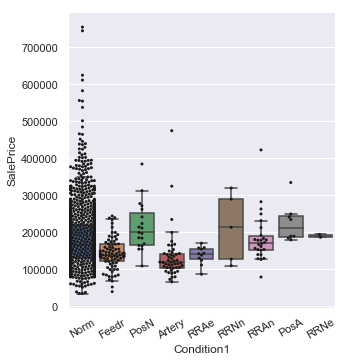

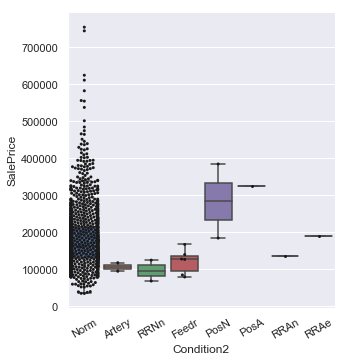

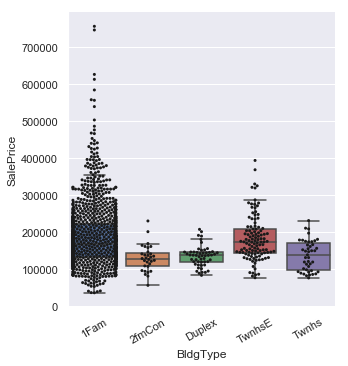

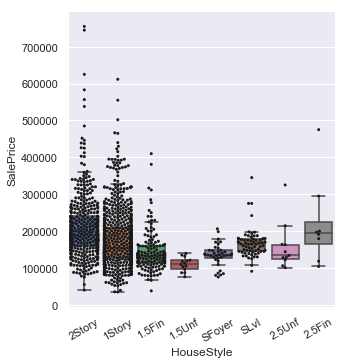

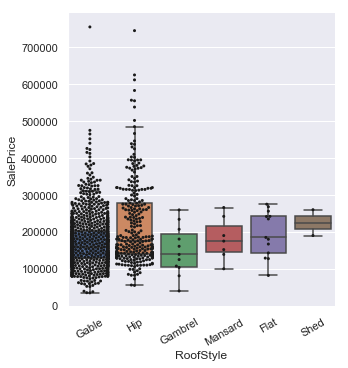

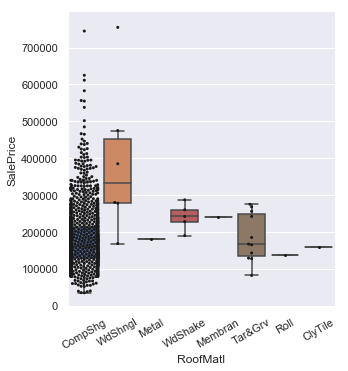

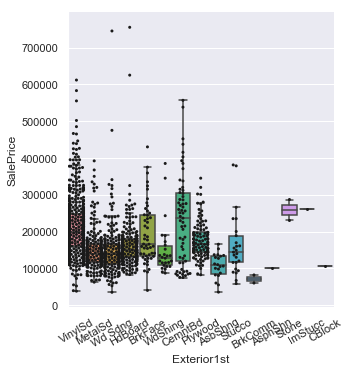

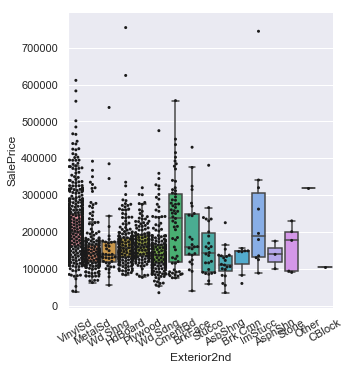

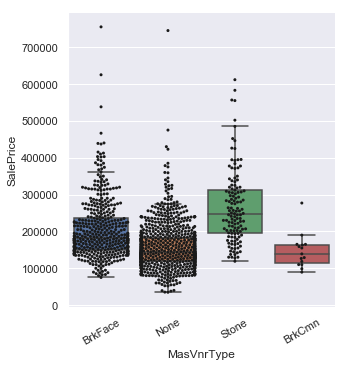

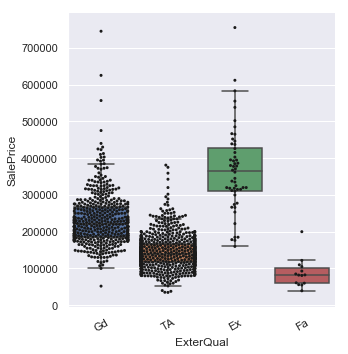

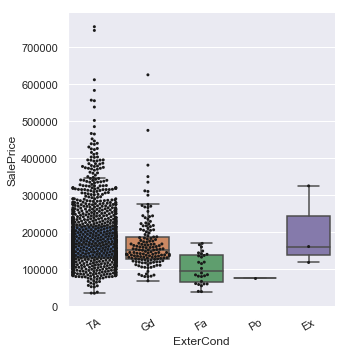

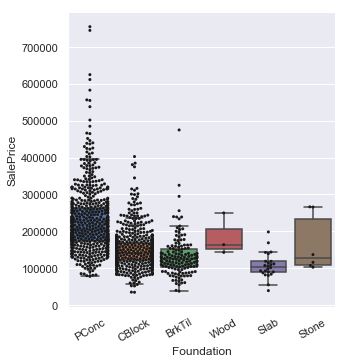

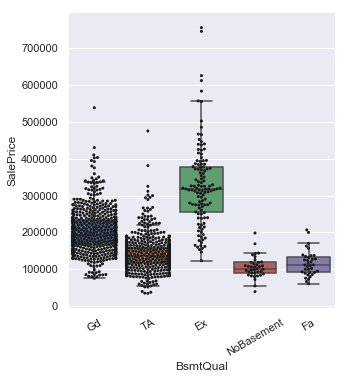

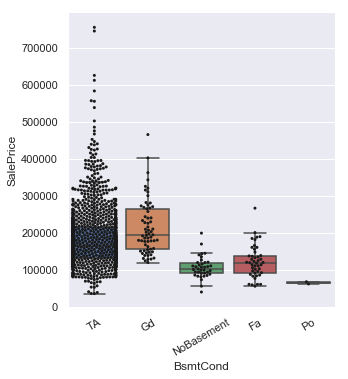

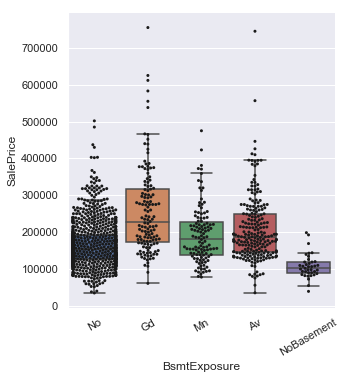

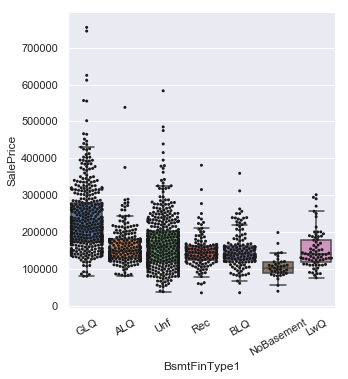

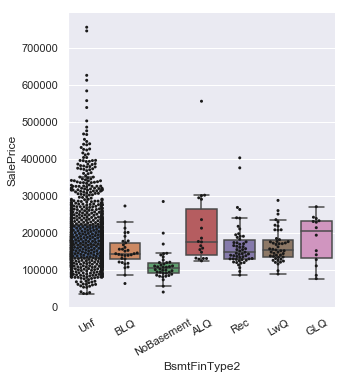

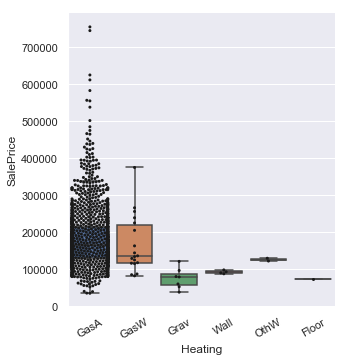

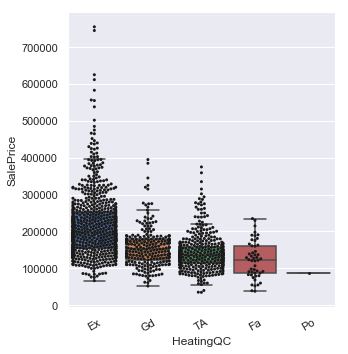

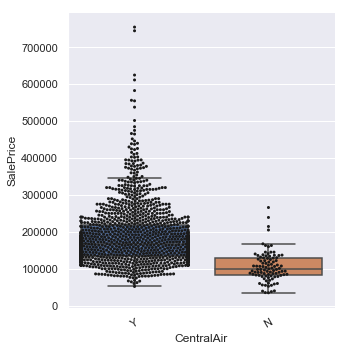

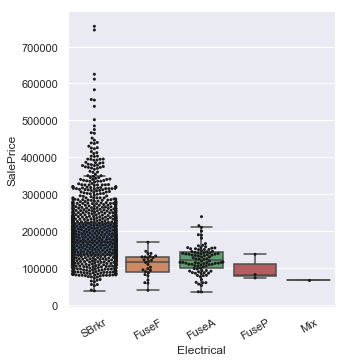

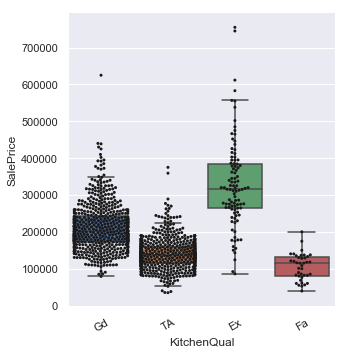

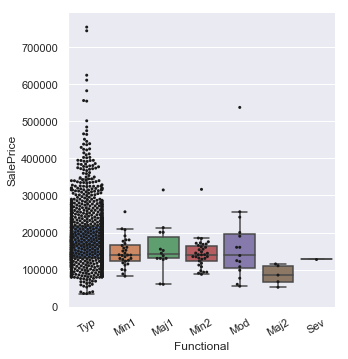

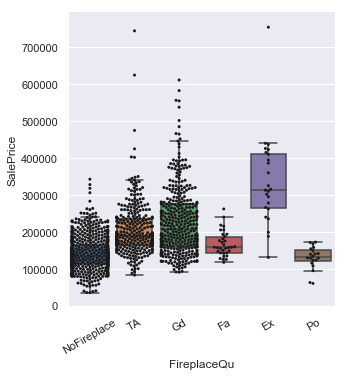

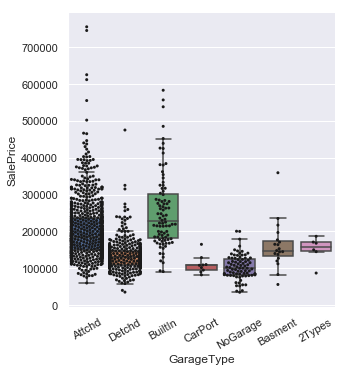

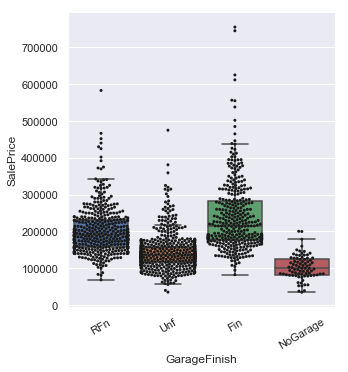

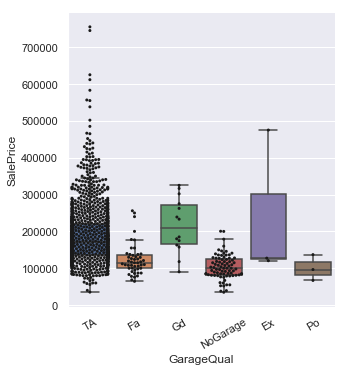

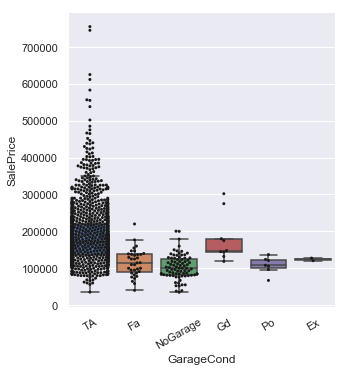

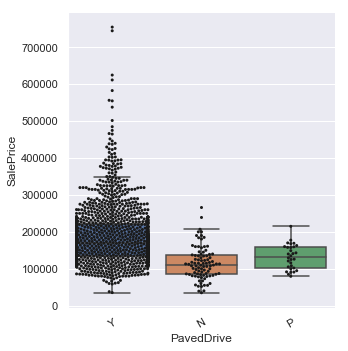

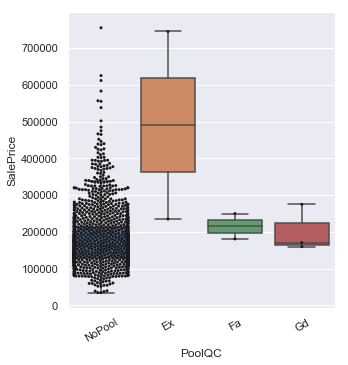

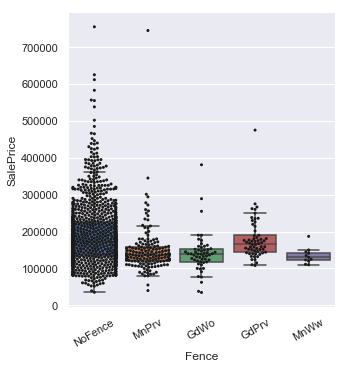

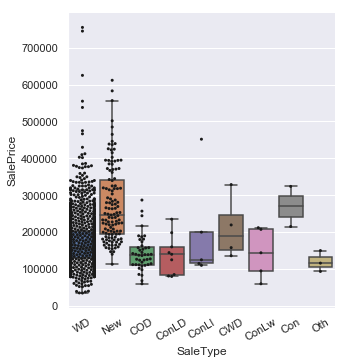

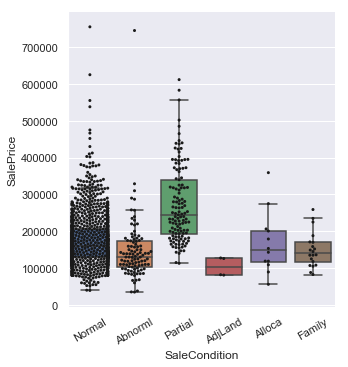

In [16]:
#plots of categorical variables
#If they aren't ranking, we will need to convert the text-values to number-values (with one-hot encodings)
#If ranking, then we will map from text to rank score 
for i in list(train_df.columns.values):
    if train_df[i].dtypes == object:
        g = sns.catplot(x=i,y='SalePrice',data=train_df,kind='box',showfliers=False)
        sns.swarmplot(x=i, y="SalePrice",color="k", size=3, data=train_df, ax=g.ax);
        g.set_xticklabels(rotation=30)
        plt.show()

        #list of low variability features: Utilities, Street 
#what I'm looking for are trends in the data, and low variability features        

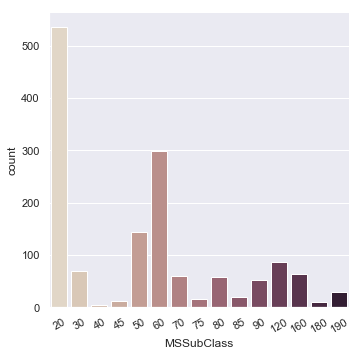

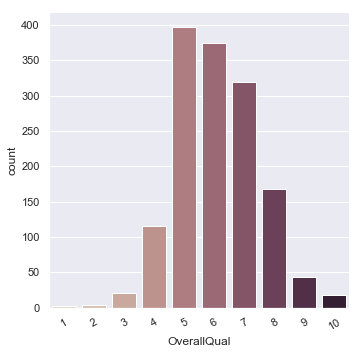

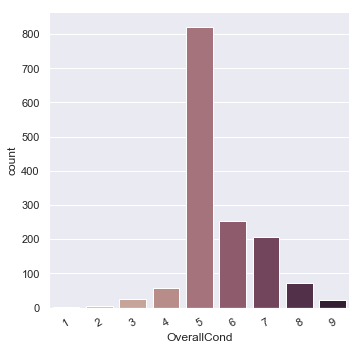

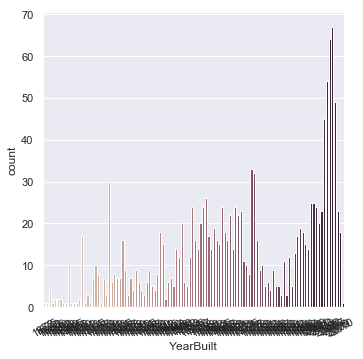

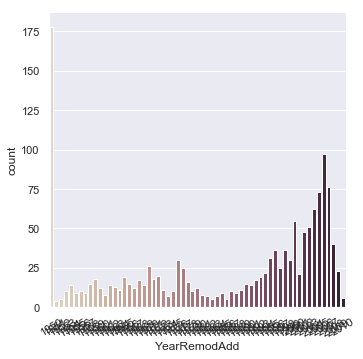

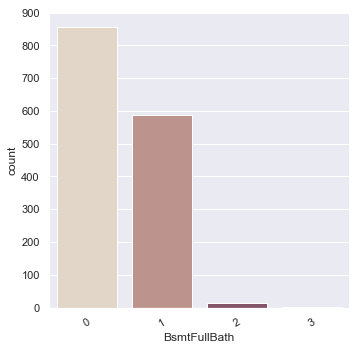

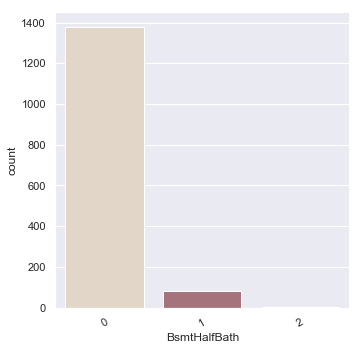

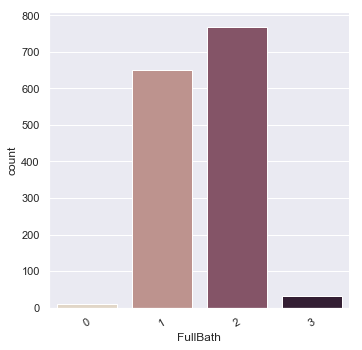

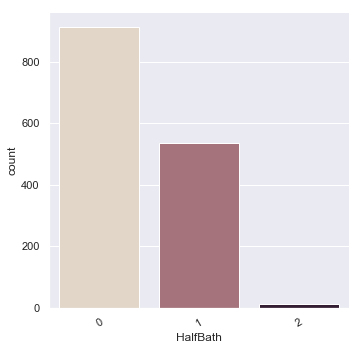

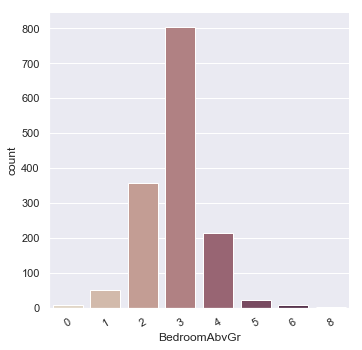

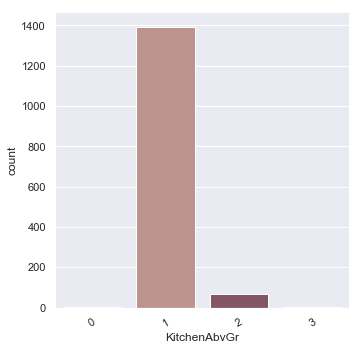

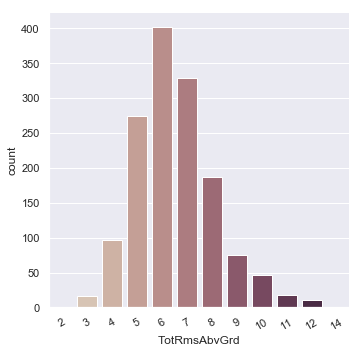

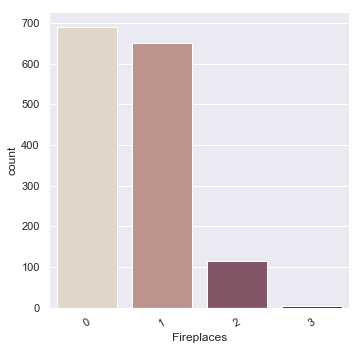

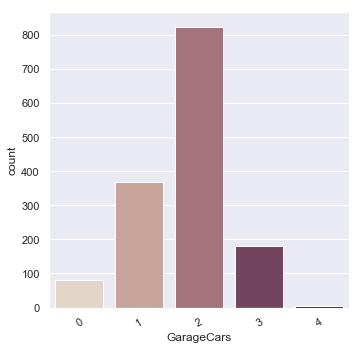

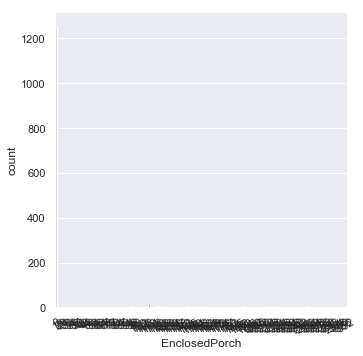

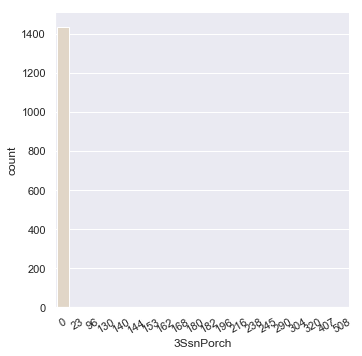

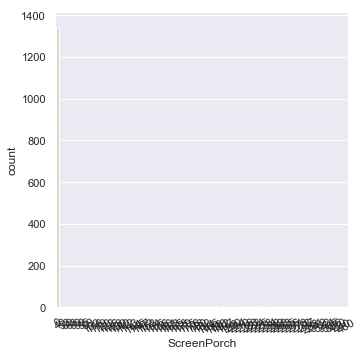

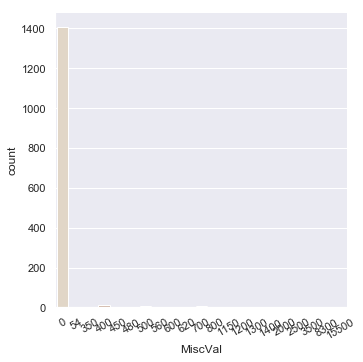

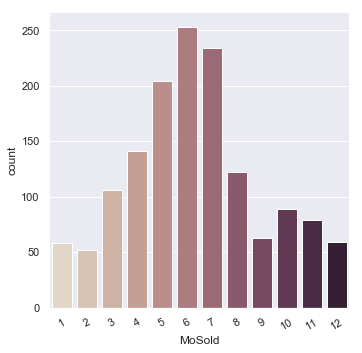

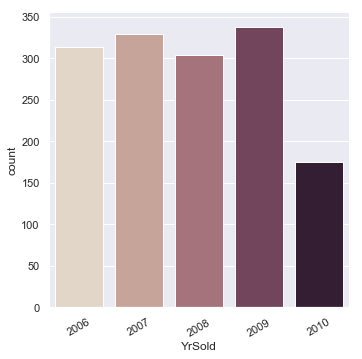

In [17]:
#for counting variables
#this loop makes histograms (for e.g. number of bathrooms, etc)
for i in list(train_df.columns.values):   
    if train_df[i].dtypes == 'int64':

        if i == 'Id':
            continue            
        if 'SF' in i:
            continue #these features are continuous
        if 'Area' in i:
            continue #these features are continuous
        if 'SalePrice' in i:
            continue                     
        g = sns.catplot(x=i,data=train_df,kind="count", palette="ch:.25")
        g.set_xticklabels(rotation=30)
        plt.show()
#I could do a classification problem, where I try to predict, say, number of bathrooms based on house price        

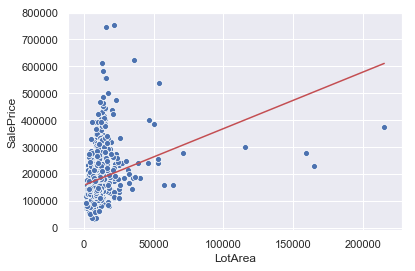

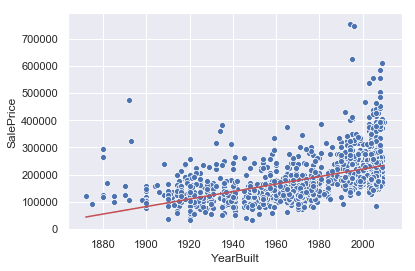

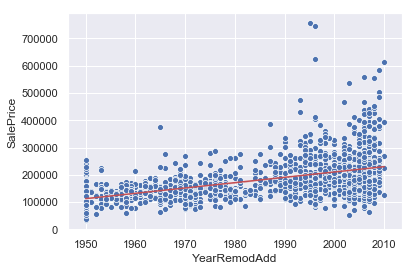

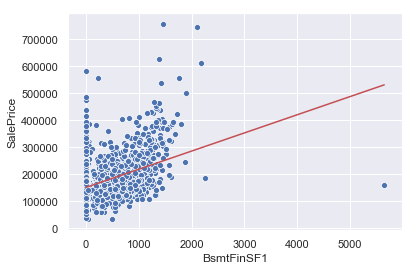

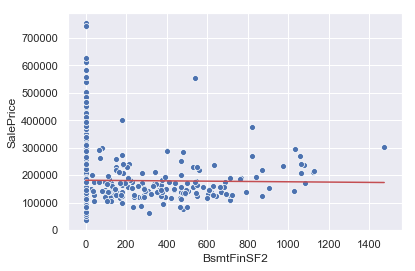

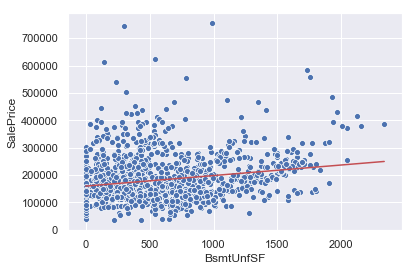

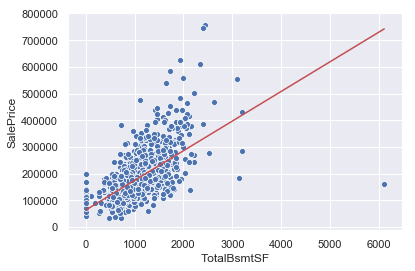

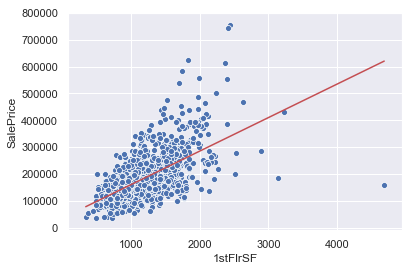

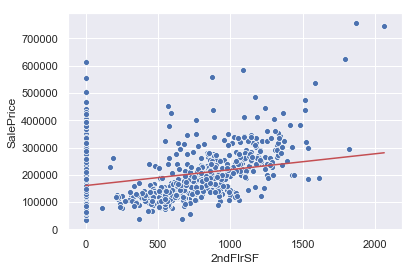

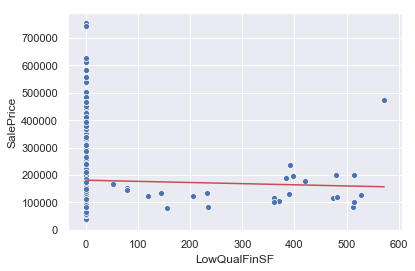

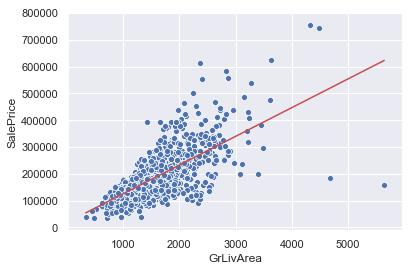

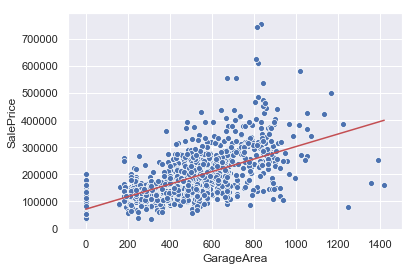

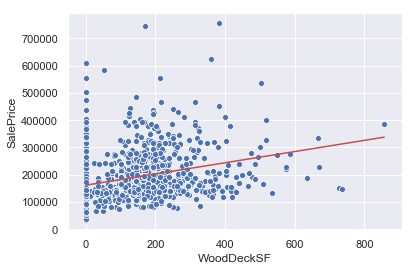

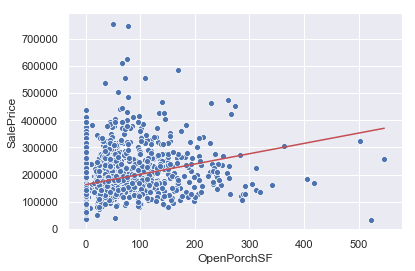

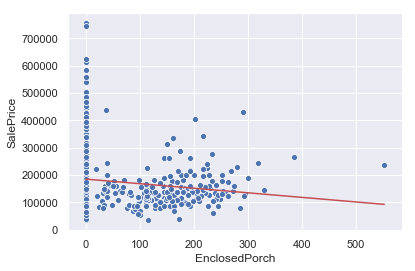

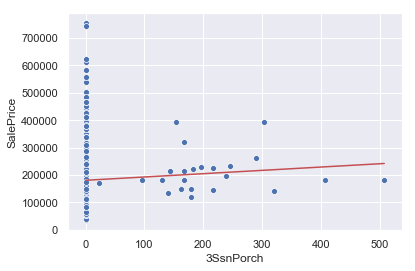

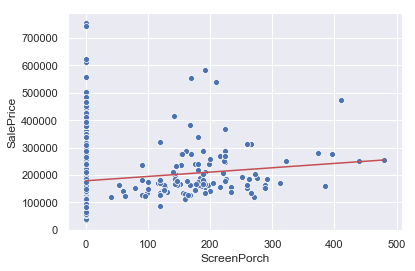

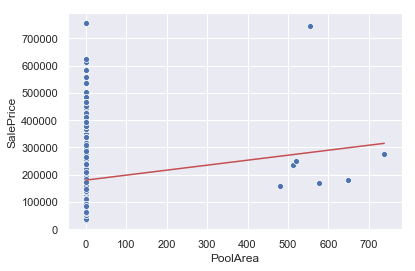

['BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']


In [18]:
#We want to plot SalePrice vs each feature that is continuous (e.g. square footages, etc)
bad_rsqr = [] #we will fit least squares model and calc Rsqr. All features below threshold recorded.

for i in list(train_df.columns.values):     
    if train_df[i].dtypes == 'int64':#only interested in number-valued features


        if ( ('SF' not in i) and ('Area' not in i) and ('EnclosedPorch' not in i) and
                ('3SsnPorch' not in i) and ('ScreenPorch' not in i) and ('Year' not in i) ):
            continue #all other features are not continuous
            

        #Create (x,y) pairs from training dataset, b/c this df has SalePrices
        x  = train_df[i]
        y  = train_df['SalePrice']
            
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)    
        z          = x*slope + intercept
        pldf       = pd.DataFrame(data={i: x, 'SalePrice': y, 'fit': z})
        fig, ax    = plt.subplots()
        g          = sns.relplot(x=i,y='fit',data=pldf,kind='line',color='r',ax=ax)        
        g          = sns.relplot(x=i,y='SalePrice',data=pldf,ax=ax)
        plt.close(2)
        plt.close(3)        
        plt.show()
            
        if r_value**2. < 0.05:
            bad_rsqr.append(i)
print(bad_rsqr)


#features with lots of zeros bias the trend, there is heteroscedasticity.

In [19]:
#map ranking text-values to numeric scores with a Python dict

cleanup_nums = {'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3,'Fa': 2, 'Po': 1, 'NoBasement': 0},
                'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3,'Fa': 2, 'Po': 1, 'NoBasement': 0},
                'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2,'No': 1, 'NoBasement': 0},
                'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4,'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NoBasement': 0},
                'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4,'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NoBasement': 0},
                'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3,'Fa': 2, 'Po': 1, 'NoFireplace': 0},
                'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3,'Fa': 2, 'Po': 1, 'NoGarage': 0},
                'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3,'Fa': 2, 'Po': 1, 'NoGarage': 0},
                'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NoGarage': 0},
                'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2,'Fa': 1, 'NoPool': 0},
                'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2,'MnWw': 1, 'NoFence': 0},
                'Utilities': {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2,'ELO': 1},
                'LandSlope': {'Gtl': 3, 'Mod': 3, 'Sev': 1},
                'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3,'Fa': 2, 'Po': 1},
                'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3,'Fa': 2, 'Po': 1},
                'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3,'Fa': 2, 'Po': 1},
                'CentralAir': {'Y': 1, 'N': 0},
                'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3,'Fa': 2, 'Po': 1},
                'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6,'Mod': 5, 'Maj1': 4, 'Maj2': 3,'Sev': 2, 'Sal': 1},
                'LotShape': {'IR3': 4, 'IR2': 3, 'IR1': 2,'Reg': 1},                    
                'PavedDrive': {'Y': 2, 'P': 1, 'N': 0},
                'Street': {'Pave': 2, 'Grvl': 1}                    
                }

train_df.replace(cleanup_nums, inplace=True)
test_df.replace(cleanup_nums, inplace=True) 


In [20]:
#drop the Id column. Will not be used in training or testing
test_IDs_df         = pd.DataFrame({'Id':test_df['Id']}) #dataframe containing IDs for test data homes

train_df            = train_df.drop(['Id'],axis=1)
test_df             = test_df.drop(['Id'],axis=1)  

In [21]:
train_X,val_X,train_y,val_y = train_test_split(train_df,train_df['SalePrice'],test_size=0.33,random_state=rng)
train_X                     = train_X.copy()
val_X                       = val_X.copy()


In [22]:
#replace NaNs in train_X

print('categorical vars')
print(train_cat_NaN)  

for i in list(train_cat_NaN): 
    #replace NaNs with column mode
    print(i,'before, NaNs = ', train_X[i].isnull().any())
    if train_X[i].isnull().any() == True:
        train_X.loc[(train_X[i].isnull(),i)] = train_X[i].mode()[0] 
    print(i,'after, NaNs = ', train_X[i].isnull().any())    
    
print('########')    
print('numeric vars')
print(train_num_NaN)  

for i in list(train_num_NaN): 
    #replace NaNs with column mode
    print(i,'before, NaNs = ', train_X[i].isnull().any())
    if train_X[i].isnull().any() == True:
        train_X.loc[(train_X[i].isnull(),i)] = train_X[i].median()
    print(i,'after, NaNs = ', train_X[i].isnull().any())     

categorical vars
['MasVnrType', 'Electrical']
MasVnrType before, NaNs =  True
MasVnrType after, NaNs =  False
Electrical before, NaNs =  True
Electrical after, NaNs =  False
########
numeric vars
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
LotFrontage before, NaNs =  True
LotFrontage after, NaNs =  False
MasVnrArea before, NaNs =  True
MasVnrArea after, NaNs =  False
GarageYrBlt before, NaNs =  True
GarageYrBlt after, NaNs =  False


In [23]:
#replace NaNs in val_X

print('categorical vars')
print(train_cat_NaN)  

for i in list(train_cat_NaN): 
    #replace NaNs with column mode
    print(i,'before, NaNs = ', val_X[i].isnull().any())
    if val_X[i].isnull().any() == True:
        val_X.loc[(val_X[i].isnull(),i)] = val_X[i].mode()[0] 
    print(i,'after, NaNs = ', val_X[i].isnull().any())    
    
print('########')    
print('numeric vars')
print(train_num_NaN)  

for i in list(train_num_NaN): 
    #replace NaNs with column mode
    print(i,'before, NaNs = ', val_X[i].isnull().any())
    if val_X[i].isnull().any() == True:
        val_X.loc[(val_X[i].isnull(),i)] = val_X[i].median()
    print(i,'after, NaNs = ', val_X[i].isnull().any()) 


categorical vars
['MasVnrType', 'Electrical']
MasVnrType before, NaNs =  True
MasVnrType after, NaNs =  False
Electrical before, NaNs =  False
Electrical after, NaNs =  False
########
numeric vars
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
LotFrontage before, NaNs =  True
LotFrontage after, NaNs =  False
MasVnrArea before, NaNs =  True
MasVnrArea after, NaNs =  False
GarageYrBlt before, NaNs =  True
GarageYrBlt after, NaNs =  False


In [24]:
#replace NaNs in test set

print('categorical vars')
print(test_cat_NaN)  

for i in list(test_cat_NaN): 
    #replace NaNs with column mode
    print(i,'before, NaNs = ', test_df[i].isnull().any())
    if test_df[i].isnull().any() == True:
        test_df.loc[(test_df[i].isnull(),i)] = test_df[i].mode()[0] 
    print(i,'after, NaNs = ', test_df[i].isnull().any())    
    
print('########')    
print('numeric vars')
print(test_num_NaN)  

for i in list(test_num_NaN): 
    #replace NaNs with column mode
    print(i,'before, NaNs = ', test_df[i].isnull().any())
    if test_df[i].isnull().any() == True:
        test_df.loc[(test_df[i].isnull(),i)] = test_df[i].median()
    print(i,'after, NaNs = ', test_df[i].isnull().any()) 

categorical vars
['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'KitchenQual', 'Functional', 'SaleType']
MSZoning before, NaNs =  True
MSZoning after, NaNs =  False
Utilities before, NaNs =  True
Utilities after, NaNs =  False
Exterior1st before, NaNs =  True
Exterior1st after, NaNs =  False
Exterior2nd before, NaNs =  True
Exterior2nd after, NaNs =  False
MasVnrType before, NaNs =  True
MasVnrType after, NaNs =  False
KitchenQual before, NaNs =  True
KitchenQual after, NaNs =  False
Functional before, NaNs =  True
Functional after, NaNs =  False
SaleType before, NaNs =  True
SaleType after, NaNs =  False
########
numeric vars
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
LotFrontage before, NaNs =  True
LotFrontage after, NaNs =  False
MasVnrArea before, NaNs =  True
MasVnrArea after, NaNs =  False
BsmtFinSF1 before, NaNs =  True
BsmtFinSF1 after, N

In [25]:
print(train_X.isnull().any().any())
print(val_X.isnull().any().any())
print(test_df.isnull().any().any())

False
False
False


In [26]:
#one-hot encoding for all the categorical features that aren't ranking-type

#first for training set    
train_X = pd.get_dummies(train_X, columns=['Alley'])
train_X = pd.get_dummies(train_X, columns=['MSZoning'])
train_X = pd.get_dummies(train_X, columns=['LandContour'])
train_X = pd.get_dummies(train_X, columns=['LotConfig'])
train_X = pd.get_dummies(train_X, columns=['Neighborhood'])
train_X = pd.get_dummies(train_X, columns=['Condition1'])
train_X = pd.get_dummies(train_X, columns=['Condition2'])
train_X = pd.get_dummies(train_X, columns=['BldgType'])
train_X = pd.get_dummies(train_X, columns=['HouseStyle'])
train_X = pd.get_dummies(train_X, columns=['RoofStyle'])
train_X = pd.get_dummies(train_X, columns=['RoofMatl'])
train_X = pd.get_dummies(train_X, columns=['Exterior1st'])
train_X = pd.get_dummies(train_X, columns=['Exterior2nd'])
train_X = pd.get_dummies(train_X, columns=['MasVnrType'])
train_X = pd.get_dummies(train_X, columns=['Foundation'])
train_X = pd.get_dummies(train_X, columns=['Heating'])
train_X = pd.get_dummies(train_X, columns=['Electrical'])
train_X = pd.get_dummies(train_X, columns=['GarageType'])
train_X = pd.get_dummies(train_X, columns=['SaleType'])
train_X = pd.get_dummies(train_X, columns=['SaleCondition'])    


In [27]:
#next for validation set

val_X = pd.get_dummies(val_X, columns=['Alley'])    
val_X = pd.get_dummies(val_X, columns=['MSZoning'])
val_X = pd.get_dummies(val_X, columns=['LandContour'])
val_X = pd.get_dummies(val_X, columns=['LotConfig'])
val_X = pd.get_dummies(val_X, columns=['Neighborhood'])
val_X = pd.get_dummies(val_X, columns=['Condition1'])
val_X = pd.get_dummies(val_X, columns=['Condition2'])
val_X = pd.get_dummies(val_X, columns=['BldgType'])
val_X = pd.get_dummies(val_X, columns=['HouseStyle'])
val_X = pd.get_dummies(val_X, columns=['RoofStyle'])
val_X = pd.get_dummies(val_X, columns=['RoofMatl'])
val_X = pd.get_dummies(val_X, columns=['Exterior1st'])
val_X = pd.get_dummies(val_X, columns=['Exterior2nd'])
val_X = pd.get_dummies(val_X, columns=['MasVnrType'])
val_X = pd.get_dummies(val_X, columns=['Foundation'])
val_X = pd.get_dummies(val_X, columns=['Heating'])
val_X = pd.get_dummies(val_X, columns=['Electrical'])
val_X = pd.get_dummies(val_X, columns=['GarageType'])
val_X = pd.get_dummies(val_X, columns=['SaleType'])
val_X = pd.get_dummies(val_X, columns=['SaleCondition'])   


In [28]:
#next for test data

test_df = pd.get_dummies(test_df, columns=['Alley'])    
test_df = pd.get_dummies(test_df, columns=['MSZoning'])
test_df = pd.get_dummies(test_df, columns=['LandContour'])
test_df = pd.get_dummies(test_df, columns=['LotConfig'])
test_df = pd.get_dummies(test_df, columns=['Neighborhood'])
test_df = pd.get_dummies(test_df, columns=['Condition1'])
test_df = pd.get_dummies(test_df, columns=['Condition2'])
test_df = pd.get_dummies(test_df, columns=['BldgType'])
test_df = pd.get_dummies(test_df, columns=['HouseStyle'])
test_df = pd.get_dummies(test_df, columns=['RoofStyle'])
test_df = pd.get_dummies(test_df, columns=['RoofMatl'])
test_df = pd.get_dummies(test_df, columns=['Exterior1st'])
test_df = pd.get_dummies(test_df, columns=['Exterior2nd'])
test_df = pd.get_dummies(test_df, columns=['MasVnrType'])
test_df = pd.get_dummies(test_df, columns=['Foundation'])
test_df = pd.get_dummies(test_df, columns=['Heating'])
test_df = pd.get_dummies(test_df, columns=['Electrical'])
test_df = pd.get_dummies(test_df, columns=['GarageType'])
test_df = pd.get_dummies(test_df, columns=['SaleType'])
test_df = pd.get_dummies(test_df, columns=['SaleCondition']) 

In [29]:
print('###before###')
print(train_X.info())
print(val_X.info())
print(test_df.info())

#use only cols that are in both dev and test

#Take columns for train_X and val_X that appear in both dataframes
train_X,val_X = train_X.align(val_X,join='inner', axis=1)
#Take columns for test_df and train_X that appear in both dataframes
test_df, train_X = test_df.align(train_X,join='inner', axis=1)
#Take columns for test_df and val_X that appear in both dataframes
test_df, val_X = test_df.align(val_X,join='inner', axis=1)

##only take cols in val_X and test_df that appear in both dataframes
#val_X,test_df = val_X.align(test_df,join='inner', axis=1)
##only take cols in train_X that appear in val_X
#val_X, train_X = val_X.align(train_X,join='left', axis=1)

##only take cols in val_X that appear in train_X   
#train_X,val_X = train_X.align(val_X,join='left', axis=1)
##only take cols in test_df that appear in train_X
#train_X, test_df = train_X.align(test_df,join='left', axis=1)

print('###after###')
print(train_X.info())
print(val_X.info())
print(test_df.info())

###before###
<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 615 to 1126
Columns: 214 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(56), uint8(155)
memory usage: 606.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 892 to 1284
Columns: 201 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(56), uint8(142)
memory usage: 292.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 204 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(14), int64(44), uint8(146)
memory usage: 869.2 KB
None
###after###
<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 615 to 1126
Columns: 193 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(55), uint8(135)
memory usage: 579.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 892 to 1284
Columns: 193 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(55),

In [30]:
scaler           = preprocessing.StandardScaler()
scaler.fit(train_X)
train_X          = scaler.transform(train_X) #this converts pandas dataframe to numpy
val_X            = scaler.transform(val_X)
test_df          = scaler.transform(test_df)


In [31]:
def run_zero( train_X, train_y, val_X, val_y, test_X):

    rows,cols          = test_X.shape
    pred_train_zero    = np.zeros(np.shape(train_y))    
    pred_val_zero      = np.zeros(np.shape(val_y))
    pred_test_zero     = np.zeros(rows)

    pred_train_zero.fill(train_y.mean())
    pred_val_zero.fill(train_y.mean())
    pred_test_zero.fill(train_y.mean())

    score_train_zero  = np.sqrt(mean_squared_error(np.log(train_y),np.log(pred_train_zero)))    
    score_val_zero    = np.sqrt(mean_squared_error(np.log(val_y),np.log(pred_val_zero)))
                
    
    return pred_test_zero, pred_val_zero, pred_train_zero, score_train_zero, score_val_zero

In [65]:
def run_gbm( train_X, train_y, val_X, val_y, test_X):
       
    params = {
        'n_estimators': 250,
        'max_depth': 3,
        'random_state': rng            
    }

    reg_gbm           = GradientBoostingRegressor(**params)    
    reg_gbm.fit(train_X,train_y)
    
    pred_train_gbm    = reg_gbm.predict(train_X)
    pred_val_gbm      = reg_gbm.predict(val_X)
    pred_test_gbm     = reg_gbm.predict(test_X)

    score_train_gbm     = np.sqrt(mean_squared_error(np.log(train_y),np.log(pred_train_gbm)))    
    score_val_gbm       = np.sqrt(mean_squared_error(np.log(val_y),np.log(pred_val_gbm)))

        
    return pred_test_gbm, pred_val_gbm, pred_train_gbm, score_train_gbm, score_val_gbm

In [66]:
def run_rf( train_X, train_y, val_X, val_y, test_X):

    params = {
        #'n_estimators': 300,
        #'max_features': 100,
        #'max_depth': 100,
        'random_state': rng
    }

    reg_rf             = RandomForestRegressor(**params)    
    reg_rf.fit(train_X,train_y)
     
    pred_train_rf      = reg_rf.predict(train_X)
    pred_val_rf        = reg_rf.predict(val_X)
    pred_test_rf       = reg_rf.predict(test_X)            

    score_train_rf     = np.sqrt(mean_squared_error(np.log(train_y),np.log(pred_train_rf)))    
    score_val_rf       = np.sqrt(mean_squared_error(np.log(val_y),np.log(pred_val_rf)))


    return pred_test_rf, pred_val_rf, pred_train_rf, score_train_rf, score_val_rf

In [67]:
def run_lasso( train_X, train_y, val_X, val_y, test_X):

    params = {
        'max_iter': 10000,
        'random_state': rng,
        'alpha': 25.0
#        'normalize': True
    }

    reg_lasso = Lasso(**params)
    reg_lasso.fit(train_X,train_y)

    pred_train_lasso  = reg_lasso.predict(train_X)
    pred_val_lasso    = reg_lasso.predict(val_X)
    pred_test_lasso   = reg_lasso.predict(test_X)

    score_train_lasso = np.sqrt(mean_squared_error(np.log(train_y),np.log(pred_train_lasso)))       
    score_val_lasso   = np.sqrt(mean_squared_error(np.log(val_y),np.log(pred_val_lasso)))

    
    return pred_test_lasso, pred_val_lasso, pred_train_lasso, score_train_lasso, score_val_lasso

In [68]:
pred_test_zero, pred_val_zero, pred_train_zero, score_train_zero, score_val_zero  = ( 
                                run_zero(train_X,train_y,val_X,val_y,test_df) )
    
pred_test_gbm,  pred_val_gbm, pred_train_gbm,  score_train_gbm,  score_val_gbm   = (
                                run_gbm(train_X,train_y,val_X,val_y,test_df) )

pred_test_rf,   pred_val_rf, pred_train_rf,   score_train_rf,   score_val_rf    = (
                                run_rf(train_X,train_y,val_X,val_y,test_df) )

pred_test_lasso,pred_val_lasso, pred_train_lasso, score_train_lasso, score_val_lasso = (
                                run_lasso(train_X,train_y,val_X,val_y,test_df) )

In [69]:
pred_train_ave   = (1./3.0) * ( pred_train_gbm  + pred_train_rf  + pred_train_lasso )
pred_val_ave     = (1./3.0) * ( pred_val_gbm  + pred_val_rf  + pred_val_lasso )
pred_test_ave    = (1./3.0) * ( pred_test_gbm + pred_test_rf + pred_test_lasso )

In [70]:
score_train_ave    = np.sqrt(mean_squared_error(np.log(train_y),np.log(pred_train_ave)))
score_val_ave    = np.sqrt(mean_squared_error(np.log(val_y),np.log(pred_val_ave)))

In [71]:
print(score_val_zero,score_val_gbm,score_val_rf,score_val_lasso,score_val_ave)

0.42280080054233676 0.13394425794283724 0.14816686872459395 0.20712017526816906 0.13050886423063895


In [72]:
print(score_train_zero,score_train_gbm,score_train_rf,score_train_lasso,score_train_ave)

0.4001096126522171 0.0521242850408515 0.07038747312950475 0.13930650392296196 0.07029980971739397


In [86]:
def run_gbm( train_X, train_y, val_X, val_y, test_X,**params):
    
    reg_gbm           = GradientBoostingRegressor(**params)    
    reg_gbm.fit(train_X,train_y)
    
    pred_train_gbm    = reg_gbm.predict(train_X)
    pred_val_gbm      = reg_gbm.predict(val_X)
    pred_test_gbm     = reg_gbm.predict(test_X)

    score_train_gbm     = np.sqrt(mean_squared_error(np.log(train_y),np.log(pred_train_gbm)))    
    score_val_gbm       = np.sqrt(mean_squared_error(np.log(val_y),np.log(pred_val_gbm)))

        
    return pred_test_gbm, pred_val_gbm, pred_train_gbm, score_train_gbm, score_val_gbm

train score=  0.23113149029920288 val score=  0.24809293952983585
train score=  0.1028960239882207 val score=  0.14370362629186878
train score=  0.08690501479591405 val score=  0.13645024517883578
train score=  0.07968579162837279 val score=  0.13406342226844045
train score=  0.06749616770656353 val score=  0.13395464445024313
train score=  0.0589368991623577 val score=  0.13334355443586102
train score=  0.05212428504085154 val score=  0.13296738244440023
train score=  0.04660250686432674 val score=  0.13389535079333995
train score=  0.041902401313540276 val score=  0.13568824050091938
train score=  0.031371579345116044 val score=  0.13420586052171873


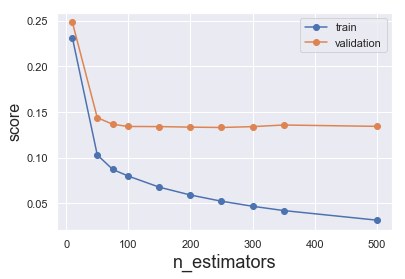

In [87]:
score_train_gbm_list = []
score_val_gbm_list   = []

lam = [10,50,75,100,150,200,250,300,350,500]

for l in lam:
    params = {
        'n_estimators': l,
        'max_depth': 3,
        'random_state': rng            
    }

    
    pred_test_gbm,  pred_val_gbm, pred_train_gbm,  score_train_gbm,  score_val_gbm   = (
        run_gbm(train_X,train_y,val_X,val_y,test_df,**params) )
    print('train score= ', score_train_gbm,'val score= ',score_val_gbm)
    score_train_gbm_list.append(score_train_gbm)
    score_val_gbm_list.append(score_val_gbm)


plt.plot(lam, score_train_gbm_list, '-o',label='train')
plt.plot(lam, score_val_gbm_list, '-o',label='validation')
plt.legend()
plt.xlabel('n_estimators', fontsize=18)
plt.ylabel('score', fontsize=16)
plt.show()

In [88]:
minpos = score_val_gbm_list.index(min(score_val_gbm_list)) 

print('optimal n_estimators= ', lam[minpos])
print(score_train_gbm_list[minpos])
print(score_val_gbm_list[minpos])        

optimal n_estimators=  250
0.05212428504085154
0.13296738244440023
